# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | ambarakaraka
City not found. Skipping...
Processing Record 3 of Set 1 | juneau
Processing Record 4 of Set 1 | el gouna
Processing Record 5 of Set 1 | sault ste. marie
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | daryapur
Processing Record 10 of Set 1 | fort bragg
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | yanchep
Processing Record 14 of Set 1 | kuta
Processing Record 15 of Set 1 | ketchikan
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | bela
Processing Record 18 of Set 1 | yagry
City not found. Skipping...
Processing Record 19 of Set 1 | yuxia
Processing Record 20 of Set 1 | hasaki
Processing Recor

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          616
Lat           616
Lng           616
Max Temp      616
Humidity      616
Cloudiness    616
Wind Speed    616
Country       616
Date          616
dtype: int64

In [9]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        616 non-null    object 
 1   Lat         616 non-null    float64
 2   Lng         616 non-null    float64
 3   Max Temp    616 non-null    float64
 4   Humidity    616 non-null    int64  
 5   Cloudiness  616 non-null    int64  
 6   Wind Speed  616 non-null    float64
 7   Country     616 non-null    object 
 8   Date        616 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.4+ KB


In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,21.14,83,20,5.11,PT,1717764499
1,juneau,58.3019,-134.4197,7.00,100,75,0.00,US,1717764286
2,el gouna,27.3942,33.6782,40.05,35,0,6.97,EG,1717764501
3,sault ste. marie,46.5168,-84.3333,11.31,96,100,5.14,CA,1717764485
4,hawaiian paradise park,19.5933,-154.9731,21.73,95,40,1.54,US,1717764502


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,21.14,83,20,5.11,PT,1717764499
1,juneau,58.3019,-134.4197,7.00,100,75,0.00,US,1717764286
2,el gouna,27.3942,33.6782,40.05,35,0,6.97,EG,1717764501
3,sault ste. marie,46.5168,-84.3333,11.31,96,100,5.14,CA,1717764485
4,hawaiian paradise park,19.5933,-154.9731,21.73,95,40,1.54,US,1717764502


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [17]:
def scatter_or_linear_reg_plots(x_values: pd.Series, y_values: pd.Series, x_name: str, y_name: str, regress=False, plot_name="", save_as="") -> None:
	# Incorporate graph properties 
	plt.xlabel(x_name)
	plt.ylabel(y_name)
	plt.xlim(min(x_values.values)-5, max(x_values.values)+5)
	plt.ylim(min(y_values.values)-2, max(y_values.values)+2)

	# If linear regression is involved, then perform the calculations without saving the figure as an image file; otherwise, just save the scatter plot.
	if regress:
		# Build scatter plot.
		plt.scatter(x_values.values, y_values.values, c="tab:blue")
		#linear regregression here.
		(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.values, y_values.values)
		regress_values = x_values * slope + intercept
		line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
		plt.plot(x_values,regress_values,"r-", label=line_eq)
		# Incorporate annotation, which is actually a legend label.
		plt.legend(frameon=False, handlelength=0, loc='best', labelcolor='red', fontsize=15)
		print(f"The r-value is: {rvalue}")
	else:
		# Build scatter plot.
		plt.scatter(x_values.values, y_values.values, c="tab:blue", edgecolors="black")
		# Incorporate the title and grids
		plt.title(f"{plot_name} ({time.strftime('%Y-%m-%d', time.localtime(city_data_df['Date'].min()))})")
		plt.grid(True)
		# Save the figure
		plt.savefig(save_as)

	# Show plot
	plt.show()

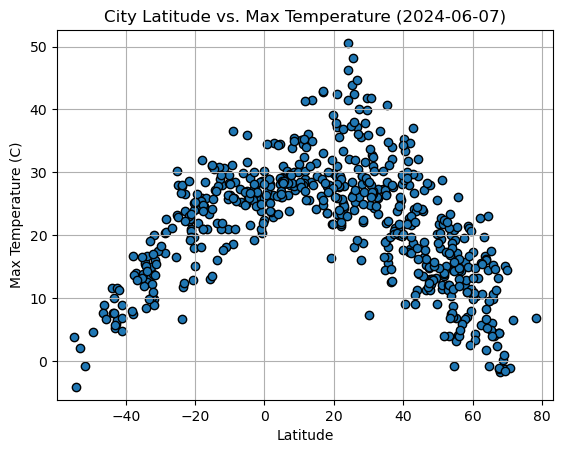

In [18]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (C)",
                            plot_name="City Latitude vs. Max Temperature", save_as="output_data/Fig1.png")


#### Latitude Vs. Humidity

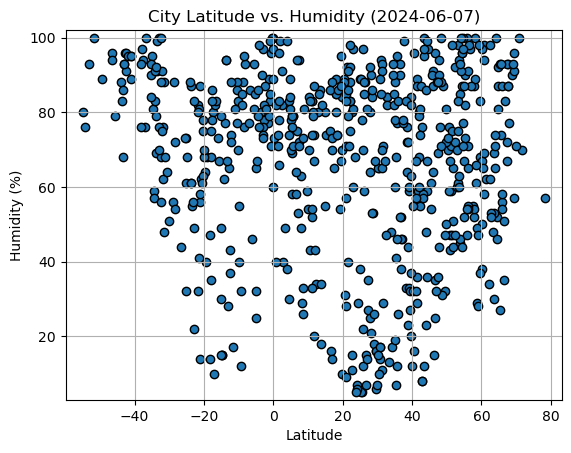

In [19]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)",
                            plot_name="City Latitude vs. Humidity", save_as="output_data/Fig2.png")


#### Latitude Vs. Cloudiness

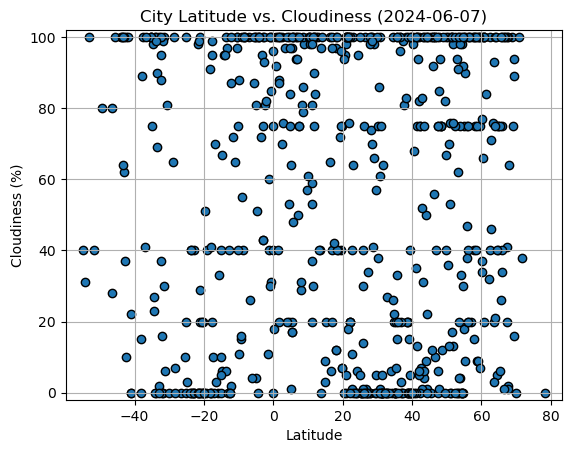

In [20]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)",
                            plot_name="City Latitude vs. Cloudiness", save_as="output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

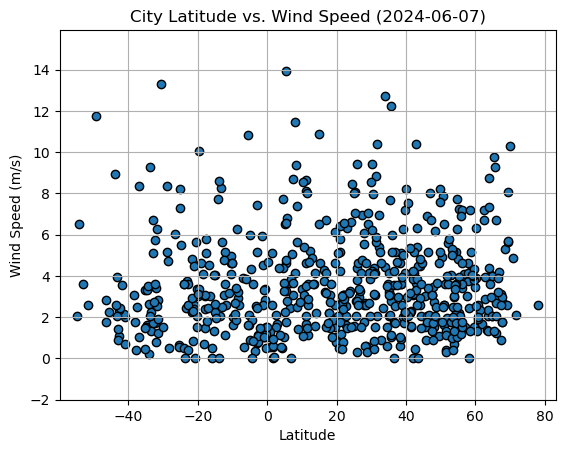

In [21]:
scatter_or_linear_reg_plots(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed (m/s)",
                            plot_name="City Latitude vs. Wind Speed", save_as="output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,praia da vitoria,38.7333,-27.0667,21.14,83,20,5.11,PT,1717764499
1,juneau,58.3019,-134.4197,7.00,100,75,0.00,US,1717764286
2,el gouna,27.3942,33.6782,40.05,35,0,6.97,EG,1717764501
3,sault ste. marie,46.5168,-84.3333,11.31,96,100,5.14,CA,1717764485
4,hawaiian paradise park,19.5933,-154.9731,21.73,95,40,1.54,US,1717764502


In [25]:
northern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 614
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        435 non-null    object 
 1   Lat         435 non-null    float64
 2   Lng         435 non-null    float64
 3   Max Temp    435 non-null    float64
 4   Humidity    435 non-null    int64  
 5   Cloudiness  435 non-null    int64  
 6   Wind Speed  435 non-null    float64
 7   Country     435 non-null    object 
 8   Date        435 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 34.0+ KB


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port-aux-francais,-49.3500,70.2167,4.62,89,80,11.76,TF,1717764503
6,edinburgh of the seven seas,-37.0676,-12.3116,13.95,76,41,8.35,SH,1717764503
9,puerto ayora,-0.7393,-90.3518,20.31,96,85,2.85,EC,1717764505
10,port alfred,-33.5906,26.8910,13.99,91,90,2.24,ZA,1717764396
11,yanchep,-31.5500,115.6833,16.08,88,100,2.81,AU,1717764506


In [26]:
southern_hemi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 5 to 615
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        181 non-null    object 
 1   Lat         181 non-null    float64
 2   Lng         181 non-null    float64
 3   Max Temp    181 non-null    float64
 4   Humidity    181 non-null    int64  
 5   Cloudiness  181 non-null    int64  
 6   Wind Speed  181 non-null    float64
 7   Country     179 non-null    object 
 8   Date        181 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.1+ KB


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7247431592817428


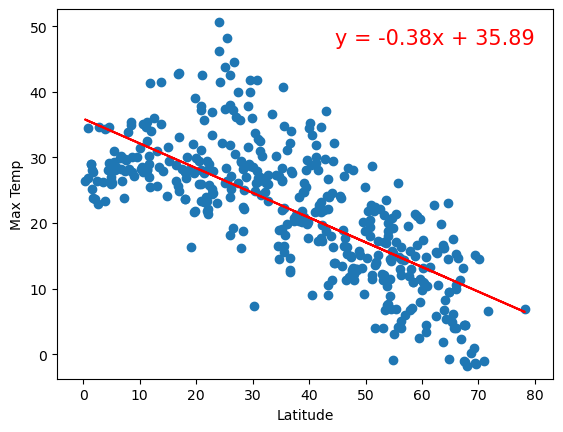

In [27]:
# Linear regression on Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", regress=True)

The r-value is: 0.8186161605887066


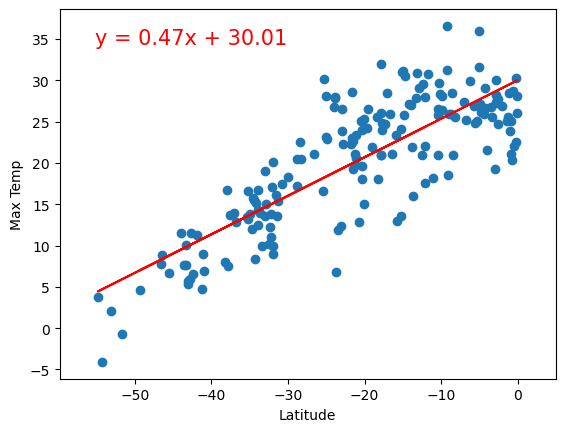

In [28]:
# Linear regression on Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", regress=True)

**Discussion about the linear relationship:** For this pair of plots, the linear regressions are modelling fairly strong (absolute r-values > 0.7) linear relationships between latitude and maximum temperature in cities; a positive linear relationship in the case of the Southern Hemisphere plot and a negative linear relationship in the case of the Northern Hemisphere. Altogether, this indicates that being closer to the equator is strongly correlated with higher temperatures, whilst being closer to the north or south pole is strongly correlated with lower temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06976558524308381


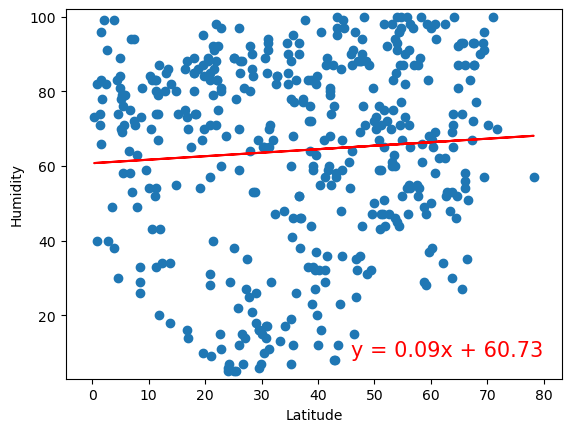

In [29]:
# Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", regress=True)

The r-value is: -0.178103740976437


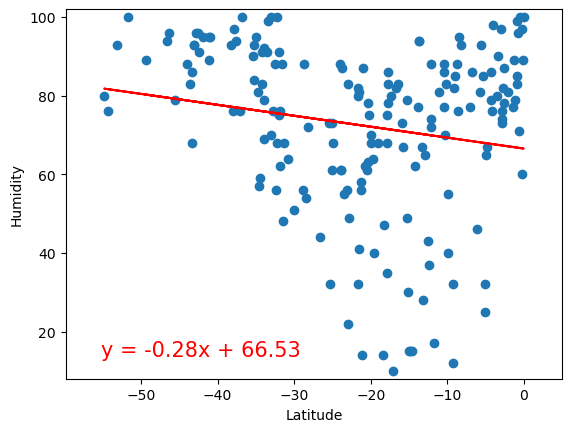

In [30]:
# Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", regress=True)

**Discussion about the linear relationship:** For this pair of plots, the linear regressions are modelling very weak (absolute r-values < 0.3) linear relationships between latitude and humidity in cities, which suggests a significant lack of direct, linear correlation between a city's latitude and its humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.047284043810058594


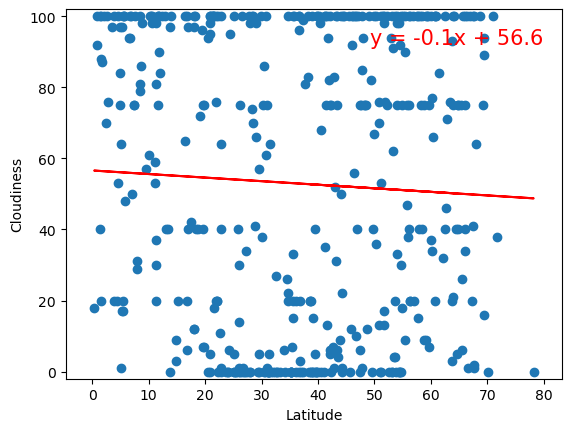

In [31]:
# Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", regress=True)

The r-value is: 0.04525083583268316


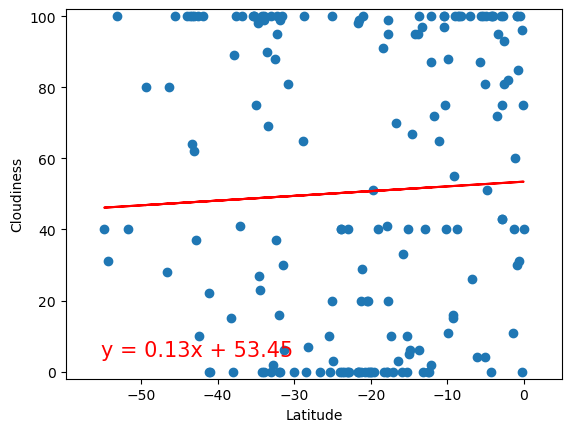

In [32]:
# Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", regress=True)

**Discussion about the linear relationship:** For this pair of plots, the linear regressions are modelling significantly weak (absolute r-values < 0.1 < 0.3) linear relationships between latitude and cloudiness in cities, which suggests a severe lack of direct, linear correlation between a city's latitude and its cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.017875520391613216


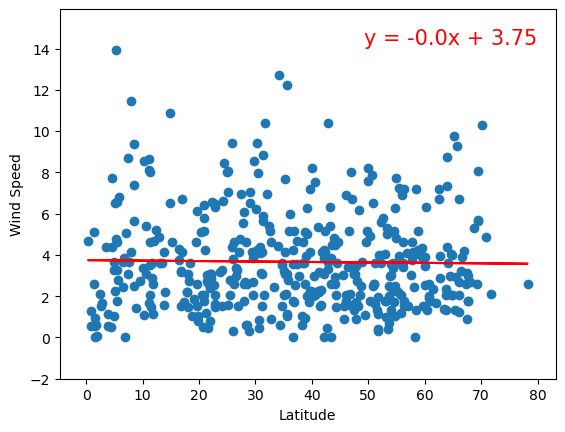

In [33]:
# Northern Hemisphere
scatter_or_linear_reg_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", regress=True)

The r-value is: -0.07610584529365898


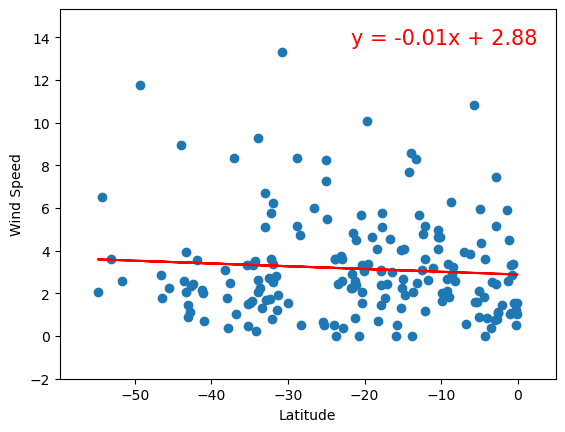

In [34]:
# Southern Hemisphere
scatter_or_linear_reg_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", regress=True)

**Discussion about the linear relationship:** For this pair of plots, the linear regressions are modelling significantly weak (absolute r-values < 0.1 < 0.3) linear relationships between latitude and cloudiness in cities, which would suggest that a city's latitude and its wind speed have almost no direct, linear correlation.